<h1 align='center'> COMP2420/COMP6420 - Introduction to Data Management,<br/> Analysis and Security</h1>

<h1 align='center'> Assignment - 1</h1>

-----
<br/>

## Grading

|**Maximum Marks**         |**100**
|--------------------------|--------
|  **Weight**              |  **15% of the Total Course Grade**
|  **Submission deadline** |  **11:59PM, Friday, March 31**
|  **Submission mode**     |  **Electronic, Using GitLab**
|  **Penalty**             |  **100% after the deadline**


## Learning Outcomes
The following learning outcomes apply to this piece:
- **LO3** - Demonstrate basic knowledge and understanding of descriptive and predictive data analysis methods, optimization and search, and knowledge representation.
- **LO4** - Formulate and extract descriptive and predictive statistics from data
- **LO5** - Analyse and interpret results from descriptive and predictive data analysis
- **LO6** - Apply their knowledge to a given problem domain and articulate potential data analysis problems


## Submission

You need to submit the following items:
- The notebook `Assignment_1_2023_uXXXXXXX.ipynb` (where uXXXXXXX is your uid) 
- A completed `statement-of-originality.md`, found in the root of the forked gitlab repo.

Submissions are performed by pushing to your forked GitLab assignment repository. For a refresher on forking and cloning repositories, please refer to `Lab 1`. Issues with your Git repo (with the exception of a CECS/ANU wide Gitlab failure) will not be considered as grounds for an extension. You will also need to add your details below. Any variation of this will result in a `zero mark`.

***** 

### Notes:

* It is strongly advised to read the whole assignment before attempting it and have at least a cursory glance at the dataset in order to gauge the requirements and understand what you need to do as a bigger picture.
* Backup your assignment to your Gitlab repo often. 
* Extra reading and research will be required. Make sure you include all references in your Statement of Originality. If this does not occur, at best marks will be deduced. Otherwise, academic misconduct processes will be followed.
* For answers requiring free form written text, use the designated cells denoted by `YOUR WRITTEN ANSWER HERE` -- double click on the cell to write inside them. Leave it blank if you don't have anything to write.
* For all coding questions please write your code after the comment `YOUR CODE HERE`. Remember to document your code using comments and doc strings as appropriate.
* In the process of testing your code, you can insert more cells or use print statements for debugging, but when submitting your file remember to remove these cells and calls respectively. You are welcome to add additional cells to the final submission, provided they add value to the overall piece.
* You will be marked on **correctness** and **readability** of your code, if your marker can't understand your code your marks may be deducted.
* Comment your code.
* Before submitting, restart the kernel in Jupyter Lab and re-run all cells before submitting your code. This will ensure the namespace has not kept any old variables, as these won't come across in submission and your code will not run. Without this, you could lose a significant number of marks.

*****


### Enter your Student ID below:

## Introduction

The study of sea ice in polar regions is of great importance due to the critical role that sea ice plays in global climate and ecosystem health. Sea ice covers vast expanses of the Arctic and Antarctic oceans, acting as a reflective surface that helps regulate the Earth's temperature by reflecting sunlight back into space. As such, changes in sea ice cover (herein, we refer it to as sea ice extent) can have significant impacts on global climate patterns and ocean currents. Sea ice also provides a critical habitat for a wide range of Arctic and Antarctic marine species, including krill, polar bears, and various species of seals. The health and abundance of these species are directly linked to the extent and duration of sea ice cover extent. Furthermore, sea ice serves as a major transportation route for commercial shipping and resource extraction. Given these factors, the study of sea ice in polar regions is essential for understanding and mitigating the impacts of climate change and ensuring the long-term sustainability of polar ecosystems and human societies. 

The primary focus of this assignment is to conduct a some basic data analysis of sea ice extent in the polar region. The analysis will be centered on the study of a given data set (SeaIceExtent.csv). Through this study, the goal is to gain a preliminary comprehension of how sea ice extent is changing in the polar regions over time. The analysis will involve the use of statistical tools and techniques to identify trends, patterns, and anomalies in the data, as well as to develop models, particularly, linear regression models, that can help predict future changes in sea ice cover. The findings of this study will be potentially valuable in informing policy decisions related to climate change mitigation and adaptation, as well as in guiding the development of sustainable strategies for managing polar resources and ecosystems. Overall, this assignment represents an important effort to contribute to our understanding of one of the most critical and rapidly changing aspects of the Earth's climate system. With all this in mind, I hope you find joy in engaging with this assignment beyond simply completing it.



*******************
## Package Imports

In [1]:
# Common Imports
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline

In [2]:
# Import additional modules here as required
#
# Note that only modules in the standard Anaconda distribution are allowed. 
# If you need to install it manually, it is not an accepted package.
#

**Several notes on printing and plotting**
* Throughout this assignment, when writing codes to print, your codes should <u>**include the relevant units and/or give relevant description**</u> of what you are printing. 

* A professional plot typically has the following characteristics:

    * Clear and concise labeling: A professional plot should have clear and concise labeling of the x and y axes, as well as a clear title that conveys the purpose of the plot.

    * Appropriate scales: The scales on the x and y axes should be appropriate for the data being presented. This means that the scales should be chosen so that the data is not too compressed or stretched out, and so that important features of the data are easily visible.

    * Appropriate plot type: The plot type should be appropriate for the data being presented. For example, if the data is continuous, a line plot or a scatter plot may be appropriate. If the data is categorical, a bar chart or a pie chart may be more appropriate.

    * Clarity: A professional plot should be visually clear and easy to interpret. This means that unnecessary elements should be removed, colors should be used judiciously, and the plot should be free of clutter.

    * Consistency: A professional plot should be consistent in its formatting with other plots that may be presented in the same report. This means that font sizes, line widths, and colors should be consistent across all plots.


****
## Q1: Loading and Basic Analysis of the Data

Briefly state your work on each Task and justify your decisions. For example, when using an existing function, briefly state what the function does (e.g., a mean function calculates the average values of the ensambles). 


#### Task 1: Load the data file SeaIceExtent.csv into a Pandas DataFrame and make it ready for use. (4 marks)

**Hints:**
* You might want to drop unnecessary or rededundant columns and/or rows.

* You might want to rename some columns and/or rows.

In [26]:
iceExtent = pd.read_csv('SeaIceExtent.csv')
iceExtent.rename(columns={' Month':'Month',' Day':'Day',"     Extent (Antarctic)":'Extent (Antarctic)',
                         "    Missing (Antarctic)":'Missing (Antarctic)',"     Extent (Arctic)":'Extent (Arctic)',
                         "    Missing (Arctic)":'Missing (Arctic)'},inplace = True)

#iceExtent['Date'] = iceExtent.apply(lambda row: "-".join([str(row['Year']), str(row['Month']), str(row['Day'])]), axis=1)
iceExtent['Year']=pd.to_numeric(iceExtent['Year'],errors = 'coerce')
iceExtent['Month']=pd.to_numeric(iceExtent['Month'],errors = 'coerce')
iceExtent['Day']=pd.to_numeric(iceExtent['Day'],errors = 'coerce')
iceExtent['Extent (Antarctic)']=pd.to_numeric(iceExtent['Extent (Antarctic)'],errors = 'coerce')
iceExtent['Extent (Arctic)']=pd.to_numeric(iceExtent['Extent (Arctic)'],errors = 'coerce')
iceExtent['Missing (Antarctic)']=pd.to_numeric(iceExtent['Missing (Antarctic)'],errors = 'coerce')
iceExtent['Missing (Arctic)']=pd.to_numeric(iceExtent['Missing (Arctic)'],errors = 'coerce')


iceExtent['Date'] = pd.to_datetime(iceExtent[['Year', 'Month', 'Day']])

iceExtent.drop(['Unnamed: 7',' Source Data','Month','Day','Year'],axis = 1,inplace = True)
iceExtent = iceExtent.iloc[1:]
iceExtent = iceExtent.reset_index(drop = True)
iceExtent = iceExtent[['Date','Extent (Antarctic)','Missing (Antarctic)','Extent (Arctic)','Missing (Arctic)']]


#### Task 2: Data basic visualisation 

- Task 2.1: Access the data and print the Antarctic and Arctic sea ice extents of week 2 of S1 2023 (February 27 to March 3, 2023). (2 marks)
    

In [27]:
start_date = iceExtent[iceExtent['Date']=='2023-02-27'] #source pandas cheat-sheet
end_date = iceExtent[iceExtent['Date']=='2023-03-03']
start_index = start_date.index[0]
end_index = end_date.index[0]
s1_week2 = iceExtent[start_index:end_index+1]
s1_week2

,Date,Extent (Antarctic),Missing (Antarctic),Extent (Arctic),Missing (Arctic)
14544,2023-02-27,1.856,0.0,14.462,0.0
14545,2023-02-28,1.848,0.0,14.476,0.0
14546,2023-03-01,1.907,0.0,14.529,0.0
14547,2023-03-02,1.908,0.0,14.627,0.0
14548,2023-03-03,1.877,0.0,14.610,0.0


- Task 2.2: In one figure, plot the daily trend of the Antarctic and Arctic sea ice extents.  (4 marks)
    

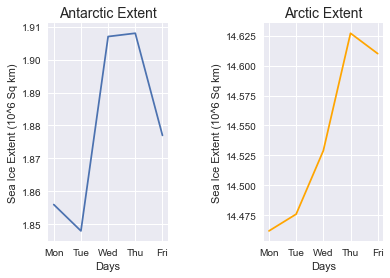

In [28]:
days = ['Mon','Tue','Wed','Thu','Fri']
antarctic_extent = s1_week2['Extent (Antarctic)'].tolist()
antarctic_extent = [float(x) for x in antarctic_extent]
arctic_extent = s1_week2['Extent (Arctic)'].tolist()
arctic_extent = [float(x) for x in arctic_extent]

plt.subplot(1,2,1)
plt.plot(days,antarctic_extent)
plt.title("Antarctic Extent",size = 14)
plt.xlabel("Days")
plt.ylabel("Sea Ice Extent (10^6 Sq km)")

plt.subplot(1,2,2)
plt.plot(days,arctic_extent,color = 'orange')
plt.title("Arctic Extent",size = 14)
plt.xlabel("Days")
plt.ylabel("Sea Ice Extent (10^6 Sq km)")


plt.subplots_adjust(wspace=0.8)
plt.show()



#### Task 3: Data basic processing
    
- Task 3.1: Identify the missing dates (the dates when the sea ice extents are not available): Store the total number of dates of each year in a table where each row specifies the year (column 1) and the total number of dates (column 2). Print the table. (4 marks)
    

In [29]:
start_year = (iceExtent['Date'].iloc[0]).year
end_year = (iceExtent['Date'].iloc[-1]).year

count = []
for year in range(start_year,end_year+1):
    date_range = pd.date_range(start = str(year)+"-01-01", end = str(year)+"-12-31")
    count.append(len(date_range.difference(iceExtent['Date'])))
date_count = {'Year':[x for x in range(start_year,end_year+1)],'No. of Missing Dates':count}
missing_dates = pd.DataFrame(date_count)
missing_dates.index = missing_dates.index+1
missing_dates

,Year,No. of Missing Dates
1,1978,331
2,1979,183
3,1980,183
4,1981,182
5,1982,183
6,1983,182
7,1984,183
8,1985,183
9,1986,182
10,1987,145


- Task 3.2: Evaluate the sea ice extent monthly averages; then similar to Task 2.2, in one figure, plot the monthly trend of the Antarctic and Arctic sea ice extents. (4 marks)

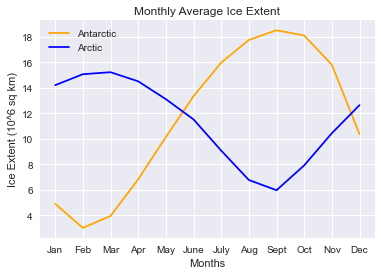

In [65]:
#groupby month for each year
monthly_antarctic = iceExtent.resample(rule='M', on='Date')['Extent (Antarctic)'].mean()
monthly_arctic = iceExtent.resample(rule='M', on='Date')['Extent (Arctic)'].mean()

antarctic_average = monthly_antarctic.groupby(monthly_antarctic.index.month).mean()
arctic_average = monthly_arctic.groupby(monthly_arctic.index.month).mean()

months = ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec']
plt.plot(months,antarctic_average,color = 'orange',label = 'Antarctic')
plt.plot(months,arctic_average, color = 'blue',label = 'Arctic')
plt.xlabel("Months")
plt.ylabel("Ice Extent (10^6 sq km)")
plt.title("Monthly Average Ice Extent")
plt.legend()
plt.show()

#### Task 4: Study the central tendency of the data

Recall from Lecture 3 that the most common measures of centre tendency are the 3M: Mode, Median, and
Mean. We study these 3Ms one-by-one as below.

- Task 4.1: Calculate and print the mode of both the Antarctic and Arctic sea ice extents. For this calculation, round both the Antarctic and Arctic sea ice extents to the nearest million. (4 marks)
    

In [103]:
print("Antarctic Median: ",iceExtent['Extent (Antarctic)'].mode()[0]," 10^6 sq km")
print("Arctic Median: ",iceExtent['Extent (Arctic)'].mode()[0]," 10^6 sq km")



Antarctic Median:  17.465999999999998  10^6 sq km
Arctic Median:  14.404000000000002  10^6 sq km


- Task 4.2: Calculate and print the median of both the Antarctic and Arctic sea ice extents (2 marks)
    

In [96]:
print("Antarctic Median: ",iceExtent['Extent (Antarctic)'].median()," 10^6 sq km")
print("Arctic Median: ",iceExtent['Extent (Arctic)'].median()," 10^6 sq km")

Antarctic Median:  12.543  10^6 sq km
Arctic Median:  11.981  10^6 sq km


- Task 4.3: Calculate and print the mean of both the Antarctic and Arctic sea ice extents (2 marks)
    

In [97]:
print("Antarctic Median: ",iceExtent['Extent (Antarctic)'].mean()," 10^6 sq km")
print("Arctic Median: ",iceExtent['Extent (Arctic)'].mean()," 10^6 sq km")

Antarctic Median:  11.612938771302925  10^6 sq km
Arctic Median:  11.253549546454044  10^6 sq km


#### Task 5: Study the variability of the data

- Task 5.1: Create two new columns to store the sums of the missing extents and the corresponding polar regions (adding Missing Antarctic to Antarctic; adding Missing Arctic to Arctic). (2 marks) 
    

In [11]:
# YOUR CODE HERE


- Task 5.2: Using the two new columns, calculate and print the range of both the Antarctic and Arctic sea ice extents (2 marks)
    

In [12]:
# YOUR CODE HERE


- Task 5.3: Using the two new columns, calculate and print the variance of both the Antarctic and Arctic sea ice extents (2 marks)
    

In [13]:
# YOUR CODE HERE


- Task 5.5: Using the two new columns, calculate and print the standard deviation of both the Antarctic and Arctic sea ice extents (2 marks)

In [14]:
# YOUR CODE HERE


******
## Q2: EXPLORATORY DATA ANALYSIS

In this section you are expected to do an exploratory data analysis on the dataset. Herein, we use the data generated in Task 5.1. 

- Task 1: Explore the correlation of the Antarctic and Arctic sea ice extents. You need to use both plot/plots and correlation test. (6 marks)

In [15]:
# YOUR CODE HERE


- Task 2: Shift the Arctic sea ice extent **forward** by six months (for example, this shift moves the date 15/01/2000 to 15/07/2000) and process your data appriopriately so that the dates match (4 marks)

    **Hints**: (a) basically you want to remove the first six months of the Antarctic sea ice extent and the last six months so that the time window matches; (b) there are dates where either Antarctic sea ice extent or Arctic sea ice extent is missing; remove these rows to match. 

In [16]:
# YOUR CODE HERE


- Task 3: Explore the correlation of the new data set. (4 marks) 
    

In [17]:
# YOUR CODE HERE


- Task 4: Compare the results of Task 3 with Task 1 and discuss the comparison. (4 marks)
    

In [18]:
# YOUR CODE HERE


- Task 5: Further exploration (12 marks)
   
    * Perform Boxplot analysis of both the the Antarctic and Arctic sea ice extents and describe the boxplots and discuss the comparison of the two. (6 marks)
    
    * Perform both one-sample (for Antartic sea ice extent with known value 1.0x10^7 square kilometers) and two-sample T-tests. (6 marks) **Hints** (a) The Lecture note 3 may be helpful (for example see page 49 regarding the definition); (b) Announce some descriptive stats on your data and explain what they mean in the context of this dataset.
    

In [19]:
# YOUR CODE HERE


******
## Q3: Linear Regression

The exciting stage is here! Your task is to create several Regression Models in this section. The goal is to build useful models (keep in mind that "All models are wrong, but some are useful", a quote by George Box) for forecasting the evolution of the sea ice extent. For this purpose and for simplicity, we focus on Antarctic region (only use data from the year 1980 to 2022 for the Antarctic sea ice except for Task 5 below). Herein, we use the data generated in Task 5.1. Specifically, the tasks are below.


- Task 1: Use the data from the year 1980 to 2021 and build a linear regression model for the Antarctic sea ice extent. Specifically, 

    - The input (x-axis) of the model should be time (the j-th day since the first day in 01/01/1980) and the output is the predicted Antarctic sea ice extent, y-axis, for a given time/date). (4 marks)
    
    - Visualise the model: in a scatter plot of the data from 1980 to 2021, draw the linear regression modeled line. (4 marks)
    
    - Apply the model to predict the sea ice extend for the year of 2022. (2 marks)
    
    - Visualise and plot the comparision of the predicted values of 2022 with the actual values from the data. (4 marks)
    
    - Calculate the root mean squared error and R-squared value of the predicted values of 2022. (2 marks)

In [20]:
# YOUR CODE HERE


- Task 2: Perform the same study as above but build four linear regression models for each year where one for each season in the year (In Australia: December to February is summer; March to May is autumn; June to August is winter; and September to November is spring. **There are only four seasons**). (8 marks: the marks in each of the five parts in Task 1 above are halved) 

    **Requirements and hints are**

    - Your model shall consists of line segments. Specifically, there should be four lines in each year (build a linear regression model for each season). Thus, in total, there should be 42*4=168 line segments. 
    
    - For better visualisation of your model, you may plot each of these line segments with one color for one season. 
    
    - In order to make a prediction about the extent of sea ice in 2022, we must use 168 line segments from the years 1980 to 2021 to create four line segments for 2022. To achieve this, we must determine the slopes and y-intercepts of these four line segments for 2022 using linear regression analysis. For example, we can use the 42 slopes of the lines of Springs over 1980 to 2021 to create a linear regression model to predict the slope of the line for Spring 2022.

In [21]:
# YOUR CODE HERE


- Task 3: Perform the same study as above (taking both Tasks 1 and 2 into consideration) but build 12 linear regression models for each year where one for each month in the year (8 marks: the marks in each of the five parts in Task 1 above are halved.)

In [22]:
# YOUR CODE HERE


- Task 4: Compare and discuss the performance of models developed in Task 1, 2, and 3. (4 marks)

In [23]:
# YOUR CODE HERE


- Task 5 (for bonus marks): Be creative and develop your own models using the data until 2021 and apply it to predict the sea ice extent of the year of 2022. The goal is to develop a model which gives smaller root mean squared errors than those from the models developed above. You can use Arctic data here if it helps (only for this Task in Q3). (5 bonus marks)

In [24]:
# YOUR CODE HERE
